In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import string
import nltk 
from nltk.corpus import stopwords
from tqdm import tqdm
import re
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\study gil\Anaconda3\envs\my_python_env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data importing

In [3]:
data = pd.read_csv("C:/Users/study gil/Documents/Reviews.csv")
print("Size of the data : ", data.shape)
# there are 568454 reviews

Size of the data :  (568454, 10)


In [4]:
# Use 50000 recent reviews
data = data.iloc[-50000:,]
data.index = np.arange(50000)

In [5]:
print("Size of the data : ", data.shape)

Size of the data :  (50000, 10)


In [6]:
# Because using 
data=data[['Text','Score']] 
data['review']=data['Text']
data['rating']=data['Score']
data.drop(['Text','Score'],axis=1,inplace=True)

In [7]:
data.head()
# distictiion between words is by 'spacing'

,review,rating
0,This is a great everyday roast. It is not my f...,4
1,I love that Starbucks has coffee available by ...,5
2,I enjoyed this roast. The subtle flavors of t...,3
3,I really enjoyed the flavor and aroma of Starb...,4
4,A friend purchased this and shared with me. Th...,4


In [8]:
# checking for the null values
print(data['review'].isnull().sum())
print(data['rating'].isnull().sum())  
# there is no any null value for review and rating.

0
0


In [9]:
data.groupby('rating').count()
# counts for each level of ratings 
# we can see that ratings are skewed to the high score (positively skewd)

,review
rating,
1,4245
2,2545
3,3637
4,7117
5,32456


In [10]:
# For binary scaling gradings with <=3 , 0 
# gradings with >3 ,1
data['rating'] = np.where(data['rating'] > 3, 1, 0)

In [11]:
data.groupby('rating').count()
# there are 39573 postive reviews
# there are 10427 negative reviews

,review
rating,
0,10427
1,39573


# Data Preprocessing and Tokenizer

In [12]:
# make review to be all lower alphabet
data['review']=data['review'].apply(lambda x: x.lower())
data.head()

,review,rating
0,this is a great everyday roast. it is not my f...,1
1,i love that starbucks has coffee available by ...,1
2,i enjoyed this roast. the subtle flavors of t...,0
3,i really enjoyed the flavor and aroma of starb...,1
4,a friend purchased this and shared with me. th...,1


In [13]:
# remove punctuations using string.punctuation
exclude = set(string.punctuation)
data['review']=data['review'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [14]:
data.head()

,review,rating
0,this is a great everyday roast it is not my fa...,1
1,i love that starbucks has coffee available by ...,1
2,i enjoyed this roast the subtle flavors of th...,0
3,i really enjoyed the flavor and aroma of starb...,1
4,a friend purchased this and shared with me thi...,1


In [15]:
top_20Words =pd.Series(' '.join(data['review']).split()).value_counts()[:20]

In [16]:
top_20Words
# all of them are stopwords which is not adequate for fitting the model
# have to remove these stopwords

the     158990
i       128251
and     109900
a       104615
to       86715
it       79068
of       68516
is       62988
this     57875
for      47657
in       46700
my       40184
that     36127
but      31917
with     30445
have     29394
you      29090
not      28628
are      27726
was      26714
dtype: int64

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\study
[nltk_data]     gil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
# these are the stopwords in english in nltk package
print(set(stopwords.words('english')))

{'the', 'wouldn', 'himself', 'why', 'm', 'those', 'but', 'while', 'any', 'was', 'all', 'shan', 'we', 'its', "hasn't", "wouldn't", 'been', 'won', 's', 'after', 'few', 'don', 'as', 'my', 'having', "should've", 'yourself', "couldn't", 'or', 'and', 'than', 'in', 'his', 'very', 'about', 'to', 're', "shouldn't", "wasn't", 'themselves', "you'd", 'a', 'because', 'her', 'had', 'i', 'their', 'at', 'from', 'me', 'more', 'not', 'll', 'needn', 'on', 'them', 'how', 'have', 'whom', 'each', 'such', "haven't", 'of', 'hadn', 'shouldn', 'yours', 'by', 'here', 'nor', 'doesn', 'out', 'again', 'did', 't', 'ours', 'you', 'itself', 'most', 'y', 'mustn', "hadn't", 'same', 'further', "you've", 'it', 'other', 'she', 'down', 'does', 'will', 'were', 'haven', 'above', 'under', "won't", 'do', 'wasn', 'they', 'mightn', 'yourselves', "don't", 'now', 'own', 'off', 'your', 'then', 'd', 'below', 'only', 'through', 'is', 'into', 'should', 'has', "you're", 'between', 'over', 'who', 'theirs', 'ma', 'myself', 'an', "shan't",

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\study
[nltk_data]     gil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
def remove_stop_word(review):
    review = [word for word in review.split(" ") if not word in stop_words]
    review = " ".join(review)
    review.strip()
    return(review)

In [22]:
data['review'] = data['review'].apply(lambda x: remove_stop_word(x))
#removing stop words in review text

In [23]:
data
# there are words with numerical digits

,review,rating
0,great everyday roast favorite starbucks holds ...,1
1,love starbucks coffee available package brew h...,1
2,enjoyed roast subtle flavors mocha nuts nice ...,0
3,really enjoyed flavor aroma starbucks pike pla...,1
4,friend purchased shared excellent medium roast...,1
...,...,...
49995,great sesame chickenthis good better resturant...,1
49996,im disappointed flavor chocolate notes especia...,0
49997,stars small give 1015 one training session tr...,1
49998,best treats training rewarding dog good groomi...,1


In [24]:
def remove_number (review):
    review = re.sub("\S*\d\S*", "", review).split()
    review = " ".join(review)
    return review

In [25]:
data['review'] = data['review'].apply(lambda x: remove_number(x))
#removing numeric words in review text

In [26]:
data

,review,rating
0,great everyday roast favorite starbucks holds ...,1
1,love starbucks coffee available package brew h...,1
2,enjoyed roast subtle flavors mocha nuts nice l...,0
3,really enjoyed flavor aroma starbucks pike pla...,1
4,friend purchased shared excellent medium roast...,1
...,...,...
49995,great sesame chickenthis good better resturant...,1
49996,im disappointed flavor chocolate notes especia...,0
49997,stars small give one training session tried tr...,1
49998,best treats training rewarding dog good groomi...,1


In [27]:
# getting 20 most freqently used words after preprocessing
top_20Words =pd.Series(' '.join(data['review']).split()).value_counts()[:20]

In [28]:
top_20Words
# we can see that there are a lot of positive - meaning words

br         22787
like       22305
good       17030
one        14951
great      14480
taste      14421
coffee     12888
tea        12603
flavor     12534
product    12415
love       11215
would      10475
food        9640
get         9577
really      8758
dont        8182
much        7944
also        7501
little      7213
time        7082
dtype: int64

In [29]:
data = data.reindex(np.random.permutation(data.index))
#shuffling the data with randomized order

# Modeling

In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
training_samples = 30000
validation_samples = 10000
max_words = 10000
maxlen = 500
token = Tokenizer(num_words = max_words)
token.fit_on_texts(data['review'].values)
sequence=token.texts_to_sequences(data['review'].values)
word_index=token.word_index
print(len(word_index))
labels=data['rating'].values
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

Using TensorFlow backend.


58496
(50000, 500)
(50000,)


In [31]:
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+10000]
y_val=labels[training_samples:training_samples+10000]
x_test=data[training_samples+10000:]
y_test=labels[training_samples+10000:]
print('X train shape is :',x_train.shape)
print('X test shape is :',x_test.shape)
print('y train shape is :',y_train.shape)
print('y test shape is :',y_test.shape)
# use 30000 observations for train
# use 10000 observations for validaion
# use 10000 observations for test

X train shape is : (30000, 500)
X test shape is : (10000, 500)
y train shape is : (30000,)
y test shape is : (10000,)


In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Flatten, Dense, Embedding,Dropout
model=Sequential()
model.add(Embedding(max_words,100,input_length=maxlen))
model.add(LSTM(64))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,042,305
Trainable params: 1,042,305
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
result=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val),verbose=2) 

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
 - 491s - loss: 0.3610 - acc: 0.8473 - val_loss: 0.3005 - val_acc: 0.8712
Epoch 2/10
 - 557s - loss: 0.2810 - acc: 0.8889 - val_loss: 0.3317 - val_acc: 0.8707
Epoch 3/10
 - 517s - loss: 0.2575 - acc: 0.8990 - val_loss: 0.2996 - val_acc: 0.8745
Epoch 4/10
 - 510s - loss: 0.2372 - acc: 0.9083 - val_loss: 0.2859 - val_acc: 0.8845
Epoch 5/10
 - 484s - loss: 0.2198 - acc: 0.9165 - val_loss: 0.3043 - val_acc: 0.8830
Epoch 6/10
 - 474s - loss: 0.2061 - acc: 0.9236 - val_loss: 0.3113 - val_acc: 0.8804
Epoch 7/10
 - 456s - loss: 0.1892 - acc: 0.9302 - val_loss: 0.3406 - val_acc: 0.8821
Epoch 8/10
 - 456s - loss: 0.1736 - acc: 0.9378 - val_loss: 0.3370 - val_acc: 0.8799
Epoch 9/10
 - 471s - loss: 0.1601 - acc: 0.9421 - val_loss: 0.4358 - val_acc: 0.8767
Epoch 10/10
 - 463s - loss: 0.1478 - acc: 0.9474 - val_loss: 0.4715 - val_acc: 0.8534


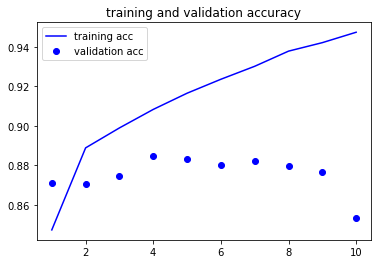

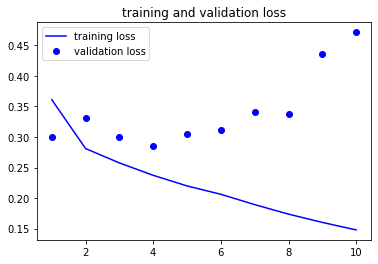

In [68]:
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [70]:
loss,acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 29 - ETA: 29 - ETA: 30 - ETA: 31 - ETA: 32 - ETA: 33 - ETA: 33 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 35 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA

In [74]:
print(loss)
print(acc)

0.4656243173837662
0.8513000011444092


In [47]:
#Using bidirectional LSTM
from keras.layers import  Bidirectional

b_model=Sequential()
b_model.add(Embedding(max_words,64,input_length=maxlen))
b_model.add(Bidirectional(LSTM(32),merge_mode='concat'))
b_model.add(Dropout(0.7))
b_model.add(Dense(1, activation='sigmoid'))
b_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
b_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 664,897
Trainable params: 664,897
Non-trainable params: 0
_________________________________________________________________


In [79]:
b_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
b_result=b_model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val),verbose=2) 

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
 - 360s - loss: 0.3757 - acc: 0.8405 - val_loss: 0.3150 - val_acc: 0.8607
Epoch 2/10
 - 357s - loss: 0.2957 - acc: 0.8835 - val_loss: 0.3175 - val_acc: 0.8725
Epoch 3/10
 - 349s - loss: 0.2718 - acc: 0.8923 - val_loss: 0.3377 - val_acc: 0.8465
Epoch 4/10
 - 348s - loss: 0.2483 - acc: 0.9054 - val_loss: 0.2851 - val_acc: 0.8824
Epoch 5/10
 - 344s - loss: 0.2334 - acc: 0.9122 - val_loss: 0.2987 - val_acc: 0.8833
Epoch 6/10
 - 345s - loss: 0.2183 - acc: 0.9189 - val_loss: 0.2853 - val_acc: 0.8846
Epoch 7/10
 - 348s - loss: 0.2059 - acc: 0.9250 - val_loss: 0.3082 - val_acc: 0.8819
Epoch 8/10
 - 355s - loss: 0.1896 - acc: 0.9318 - val_loss: 0.3194 - val_acc: 0.8734
Epoch 9/10
 - 353s - loss: 0.1796 - acc: 0.9356 - val_loss: 0.3224 - val_acc: 0.8768
Epoch 10/10
 - 356s - loss: 0.1681 - acc: 0.9411 - val_loss: 0.4089 - val_acc: 0.8487


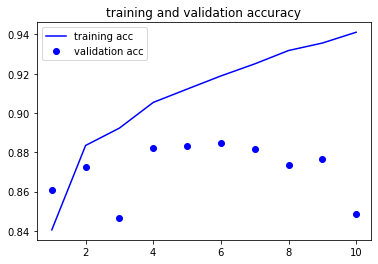

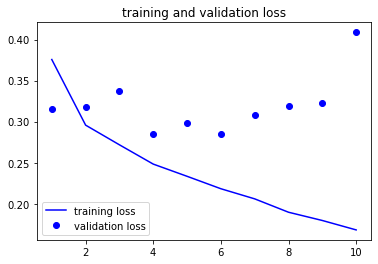

In [85]:
acc=b_result.history['acc']
val_acc=b_result.history['val_acc']
loss=b_result.history['loss']
val_loss=b_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [86]:
loss,acc=b_model.evaluate(x_test,y_test)
print(loss)
print(acc)

10000/10000 [==============================] - ETA: 1: - ETA: 49s - ETA: 40 - ETA: 36 - ETA: 33 - ETA: 31 - ETA: 29 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 24 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ETA: 25 - ET

In [87]:
print(loss)
print(acc)

0.6833459907531738
0.784600019454956


In [48]:
#Using bidirectional LSTM + recurrent dropout + early stopping
from keras.layers import  Bidirectional
from keras.callbacks import EarlyStopping

b_model=Sequential()
b_model.add(Embedding(max_words,64,input_length=maxlen))
b_model.add(Bidirectional(LSTM(32,recurrent_dropout = 0.3),merge_mode='mul'))
b_model.add(Dropout(0.5))
b_model.add(Dense(16))
b_model.add(Dropout(0.5))
b_model.add(Dense(1, activation='sigmoid'))
b_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
b_model.summary()


early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 64)           640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                24832     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 665,377
Trainable params: 665,377
Non-trainable params: 0
________________________________________________

In [90]:
b_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
b_result=b_model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val), callbacks=[early_stop], verbose=2) 

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
 - 381s - loss: 0.4035 - acc: 0.8345 - val_loss: 0.3489 - val_acc: 0.8623
Epoch 2/10
 - 374s - loss: 0.3054 - acc: 0.8787 - val_loss: 0.2960 - val_acc: 0.8728
Epoch 3/10
 - 381s - loss: 0.2829 - acc: 0.8912 - val_loss: 0.2868 - val_acc: 0.8784
Epoch 4/10
 - 378s - loss: 0.2643 - acc: 0.8995 - val_loss: 0.2912 - val_acc: 0.8826
Epoch 5/10
 - 375s - loss: 0.2463 - acc: 0.9080 - val_loss: 0.3000 - val_acc: 0.8825
Epoch 00005: early stopping


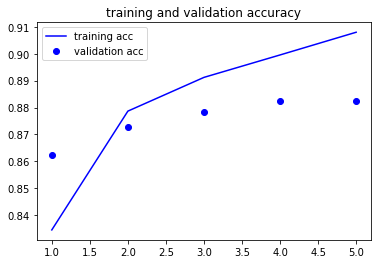

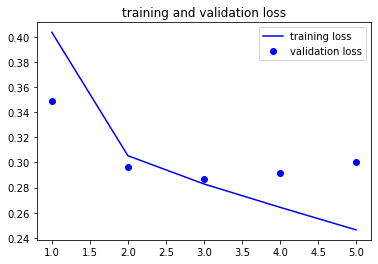

In [91]:
acc=b_result.history['acc']
val_acc=b_result.history['val_acc']
loss=b_result.history['loss']
val_loss=b_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [92]:
loss,acc=b_model.evaluate(x_test,y_test)
print(loss)
print(acc)

10000/10000 [==============================] - ETA: 22 - ETA: 21 - ETA: 22 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 18 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 20 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA: 21 - ETA

In [93]:
print(loss)
print(acc)

0.30039156410694123
0.8795999884605408


In [33]:
import os
glove_dir='C:/Users/study gil/Documents/glove.6B/glove.6B'
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF8')
for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=seq
f.close
print(len(embedding_index))

400000


In [34]:
embedding_dim=100
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [49]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten,Dropout
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Bidirectional(LSTM(32,recurrent_dropout = 0.3),merge_mode='mul'))
model_gl.add(Dropout(0.5))
model_gl.add(Dense(16))
model_gl.add(Dropout(0.5))
model_gl.add(Dense(1, activation='sigmoid'))
model_gl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gl.summary()


early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32)                34048     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 1,034,593
Trainable params: 1,034,593
Non-trainable params: 0
____________________________________________

In [50]:
model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False

In [51]:
model_gl.layers[0].set_weights([embedding_matrix])
model_gl.layers[0].trainable=False
model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gl_result=model_gl.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val),verbose=2) 

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
 - 395s - loss: 0.4639 - acc: 0.8010 - val_loss: 0.4598 - val_acc: 0.8142
Epoch 2/10
 - 377s - loss: 0.3981 - acc: 0.8253 - val_loss: 0.3744 - val_acc: 0.8421
Epoch 3/10
 - 372s - loss: 0.3815 - acc: 0.8378 - val_loss: 0.3585 - val_acc: 0.8466
Epoch 4/10
 - 378s - loss: 0.3620 - acc: 0.8465 - val_loss: 0.3441 - val_acc: 0.8553
Epoch 5/10
 - 366s - loss: 0.3501 - acc: 0.8547 - val_loss: 0.3355 - val_acc: 0.8582
Epoch 6/10
 - 346s - loss: 0.3391 - acc: 0.8579 - val_loss: 0.3371 - val_acc: 0.8593
Epoch 7/10
 - 342s - loss: 0.3396 - acc: 0.8573 - val_loss: 0.3289 - val_acc: 0.8617
Epoch 8/10
 - 380s - loss: 0.3266 - acc: 0.8642 - val_loss: 0.3201 - val_acc: 0.8662
Epoch 9/10
 - 376s - loss: 0.3170 - acc: 0.8682 - val_loss: 0.3175 - val_acc: 0.8680
Epoch 10/10
 - 356s - loss: 0.3109 - acc: 0.8730 - val_loss: 0.3419 - val_acc: 0.8606


In [53]:
loss,acc=model_gl.evaluate(x_test,y_test)

10000/10000 [==============================] - ETA: 22 - ETA: 23 - ETA: 24 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 23 - ETA: 24 - ETA: 24 - ETA: 25 - ETA: 25 - ETA: 26 - ETA: 26 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 26 - ETA

In [54]:
print(loss)
print(acc)

0.3322853320360184
0.8666999936103821
